In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np
import glob
import os


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
def bb(data, window):

    sma = data.rolling(window = window).mean()
    std = data.rolling(window = window).std()
    
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    
    return upper_bb, lower_bb, sma


In [5]:
path = r'data/'                     # use your path
all_files = glob.glob(os.path.join(path, "BTC.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

In [6]:
# NB SAMPLE
window = 20

data = pd.read_csv(file)

data = data.set_index('datetime')

upper_bb, lower_bb, sma = bb(data['c'], window)


data['upper_bb'] = upper_bb
data['lower_bb'] = lower_bb
data['sma'] = sma

print(data)
    

                           o        h        l        c            v  \
datetime                                                               
2020-11-19 01:00:00  0.03000  0.12000  0.03000  0.03777  713299610.3   
2020-11-20 01:00:00  0.03776  0.04600  0.03350  0.03573  320411540.0   
2020-11-21 01:00:00  0.03571  0.04000  0.03260  0.03791  282877391.0   
2020-11-22 01:00:00  0.03790  0.04220  0.03519  0.04162  172188146.1   
2020-11-23 01:00:00  0.04168  0.05450  0.03860  0.04704  334746436.4   
...                      ...      ...      ...      ...          ...   
2021-11-26 01:00:00  0.36201  0.36398  0.29700  0.31854  327945952.8   
2021-11-27 01:00:00  0.31913  0.34297  0.30145  0.30630  151855460.4   
2021-11-28 01:00:00  0.30629  0.35475  0.27082  0.32925  267870141.2   
2021-11-29 01:00:00  0.32947  0.35758  0.30110  0.33017  250127675.9   
2021-11-30 01:00:00  0.33000  0.34897  0.30188  0.30639  235830636.9   

                     upper_bb  lower_bb       sma  
datetime   

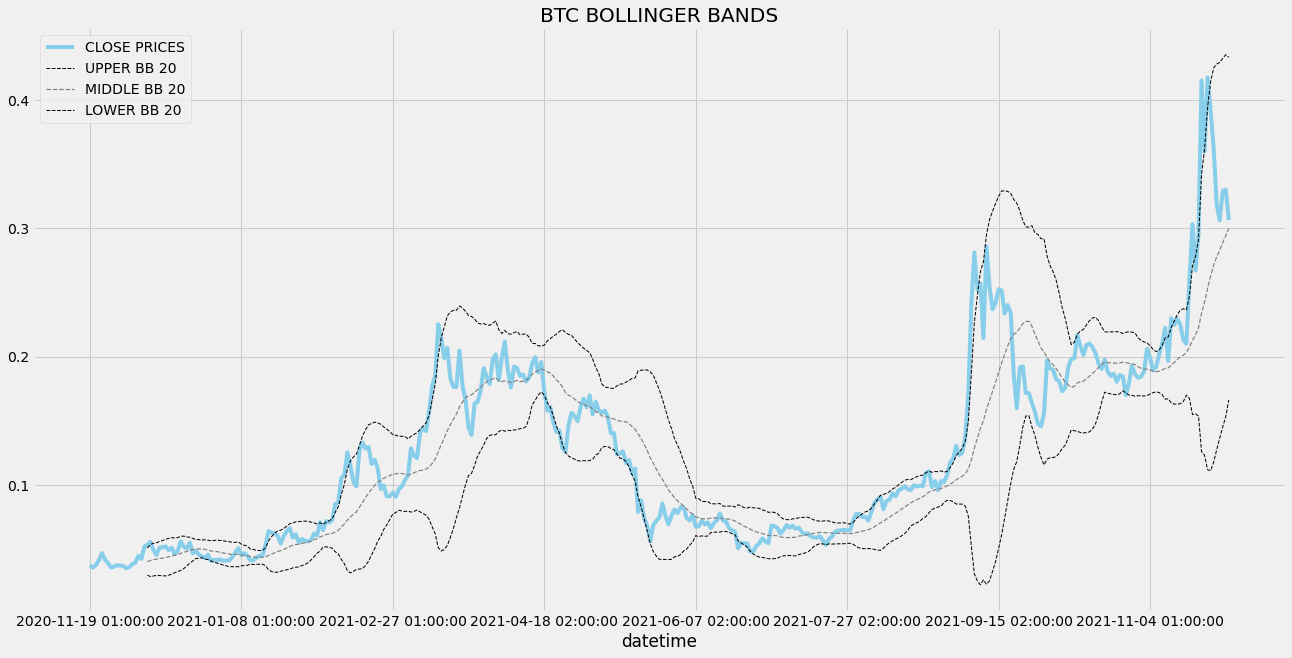

In [8]:
data['c'].plot(label = 'CLOSE PRICES', color = 'skyblue')
data['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
data['sma'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
data['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('BTC BOLLINGER BANDS')
plt.show()

In [9]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(data['c'], data['lower_bb'], data['upper_bb'])

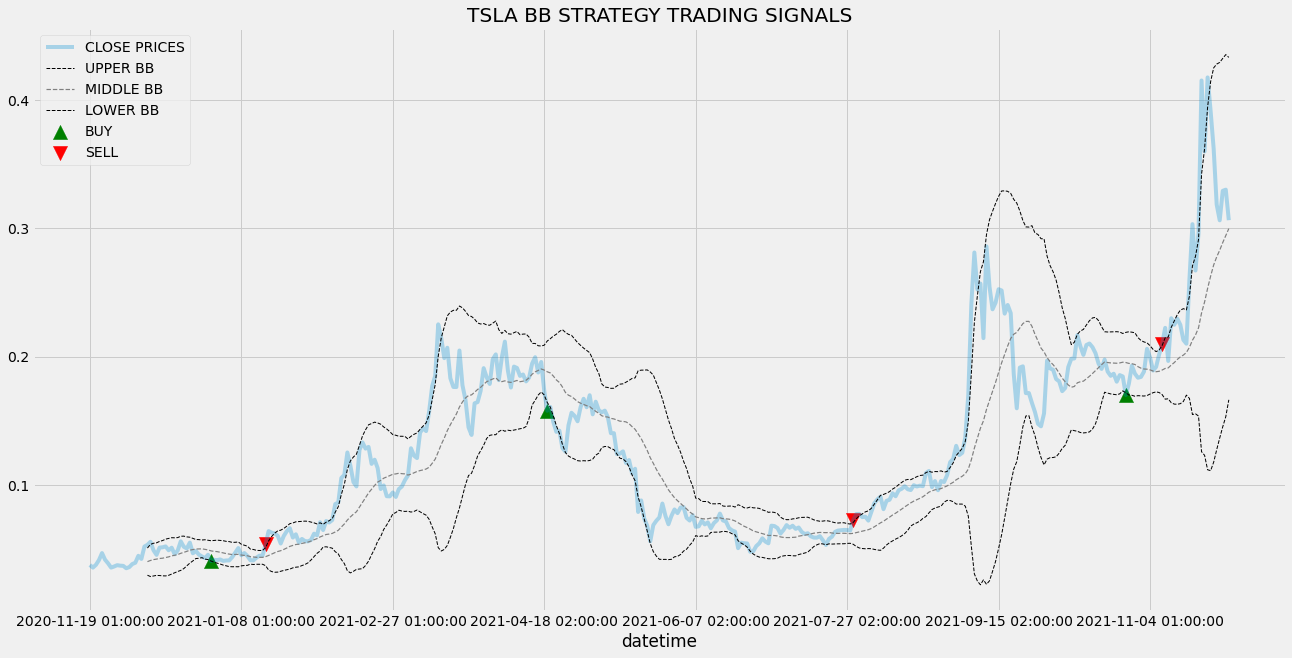

In [10]:
data['c'].plot(label = 'CLOSE PRICES', alpha = 0.3)
data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
data['sma'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('TSLA BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [12]:
# https://tradingsim.com/blog/bollinger-bands/
def bb_alarm(dat, lower_bb, upper_bb, momentum=0.5):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(dat)):
        # si le prix k-1 est supérieur à la bande inferieur
        # et le prix est inferieur à la bande inferieur
        if dat[i-1] > lower_bb[i-1] and dat[i] < lower_bb[i]:
            signal = 1
            bb_signal.append(signal)
            #to plot
            buy_price.append(dat[i])
            sell_price.append(np.nan)

        elif dat[i-1] < upper_bb[i-1] and dat[i] > upper_bb[i]:
            signal = -1
            bb_signal.append(signal)
            sell_price.append(dat[i])
            buy_price.append(np.nan)

        else:
            if(i != 0):
                bb_signal.append(bb_signal[i-1] * momentum)
            else:
                bb_signal.append(0)
                
            sell_price.append(np.nan)
            buy_price.append(np.nan)
                 
    return buy_price, sell_price, bb_signal

In [13]:
buy_price, sell_price, bb_signal = bb_alarm(data['c'], data['lower_bb'], data['upper_bb'], 0.5)

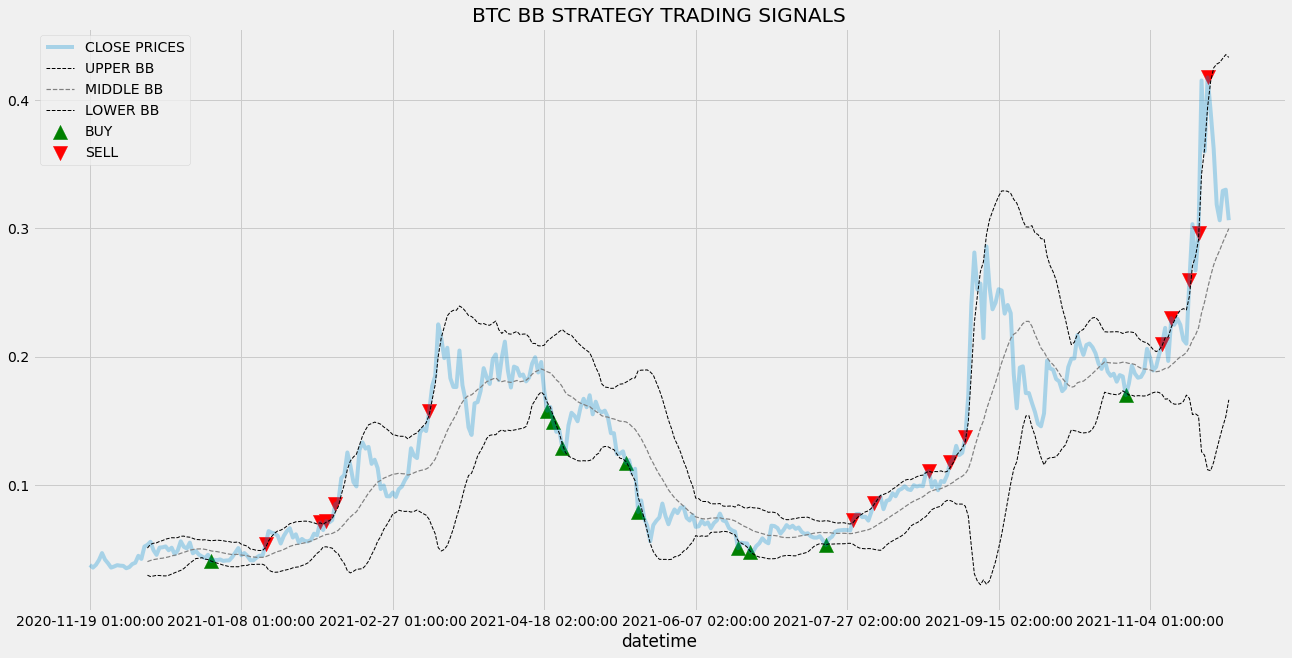

In [14]:
data['c'].plot(label = 'CLOSE PRICES', alpha = 0.3)
data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
data['sma'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('BTC BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [15]:
bb_signal

[0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.000244140625,
 0.0001220703125,
 6.103515625e-05,
 3.0517578125e-05,
 1.52587890625e-05,
 7.62939453125e-06,
 -1,
 -0.5,
 -0.25,
 -0.125,
 -0.0625,
 -0.03125,
 -0.015625,
 -0.0078125,
 -0.00390625,
 -0.001953125,
 -0.0009765625,
 -0.00048828125,
 -0.000244140625,
 -0.0001220703125,
 -6.103515625e-05,
 -3.0517578125e-05,
 -1.52587890625e-05,
 -7.62939453125e-06,
 -1,
 -0.5,
 -1,
 -0.5,
 -0.25,
 -1,
 -0.5,
 -0.25,
 -0.125,
 -0.0625,
 -0.03125,
 -0.015625,
 -0.0078125,
 -0.00390625,
 -0.001953125,
 -0.0009765625,
 -0.00048828125,
 -0.000244140625,
 -0.0001220703125,
 -6.103515625e-05,
 -3.0517578125e-05,
 -1.52587890625e-05,
 -7.

In [19]:
# NB SAMPLE
window = 20
threshold = 0.01

path = r'data/'
all_files = glob.glob(os.path.join(path, "*.csv")) 

should_buy = {}
should_sell = {}
for file in all_files:
    data = pd.read_csv(file)

    data = data.set_index('datetime')
    
    upper_bb, lower_bb, sma = bb(data['c'], window)
    
    buy_price, sell_price, bb_signal = bb_alarm(data['c'], lower_bb, upper_bb, 0.5)

    name = file.split('/', 1 )
    name = name[1].split('.', 1 )[0]
    
    today_bb = bb_signal[-1]
    
    if today_bb > threshold:
        should_buy[name] = today_bb
    elif today_bb < -threshold:
        should_sell[name] = today_bb
    

In [20]:
print(should_buy)
print(should_sell)

{'XRP': 0.0625, 'ADA': 0.0625, 'TRX': 0.0625}
{'GALA': -0.015625, 'MBOX': -1, 'LUNA': -1, 'GHST': -0.015625, 'ZEC': -0.015625, 'STX': -0.5, 'ANKR': -0.0625, 'RSR': -0.5, 'BAT': -0.125, 'OCEAN': -0.5, 'MANA': -0.015625}
